In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("Wholesale customers data.csv")
df.shape

(440, 8)

In [28]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [29]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
df['Channel'].nunique()

2

In [31]:
df['Region'].nunique()

3

In [32]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [33]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [36]:
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

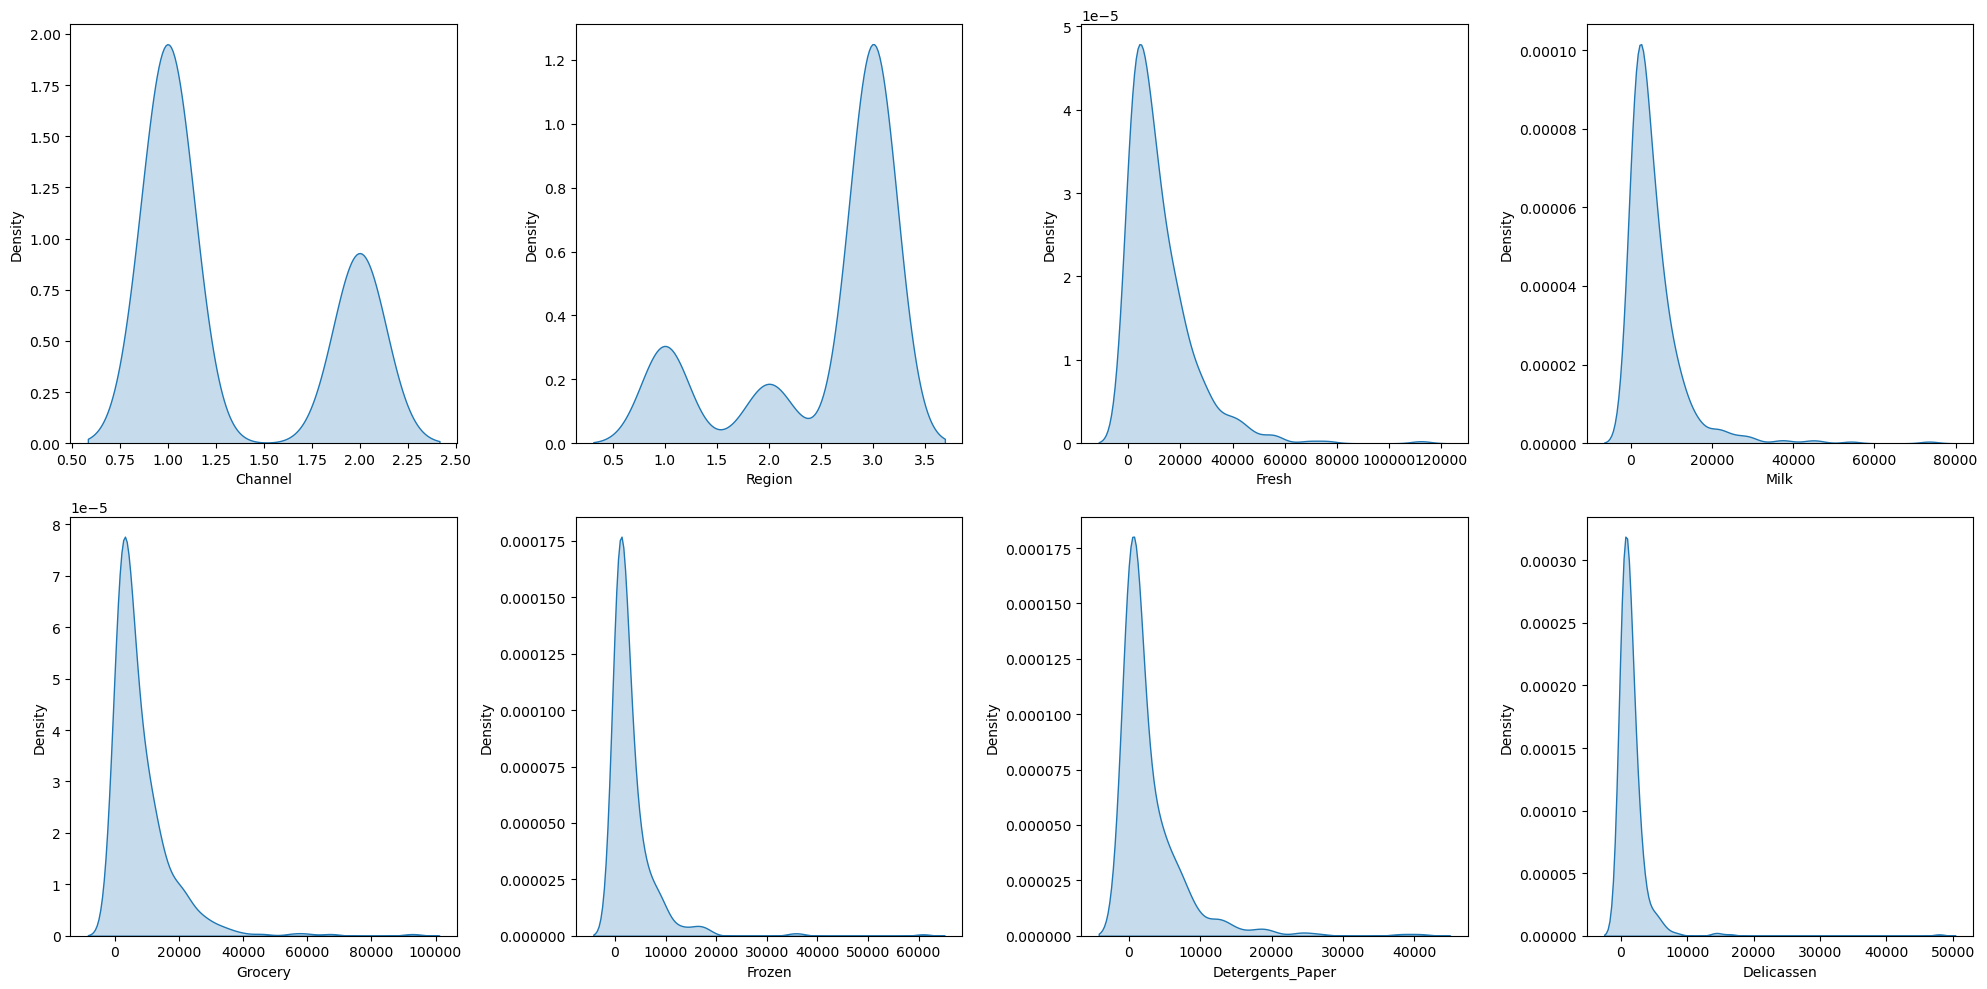

In [37]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.kdeplot(df[col],fill=True)
plt.tight_layout()
plt.show()

In [38]:
df['Channel']=np.log1p(df['Channel'])
df['Region']=np.log1p(df['Region'])
df['Fresh'] = np.log1p(df['Fresh'])
df['Milk'] = np.log1p(df['Milk'])
df['Grocery'] = np.log1p(df['Grocery'])
df['Frozen'] = np.log1p(df['Frozen'])
df['Detergents_Paper'] = np.log1p(df['Detergents_Paper'])
df['Delicassen'] = np.log1p(df['Delicassen'])
df.skew()

Channel             0.760951
Region             -1.385733
Fresh              -1.575326
Milk               -0.224063
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Delicassen         -1.091827
dtype: float64

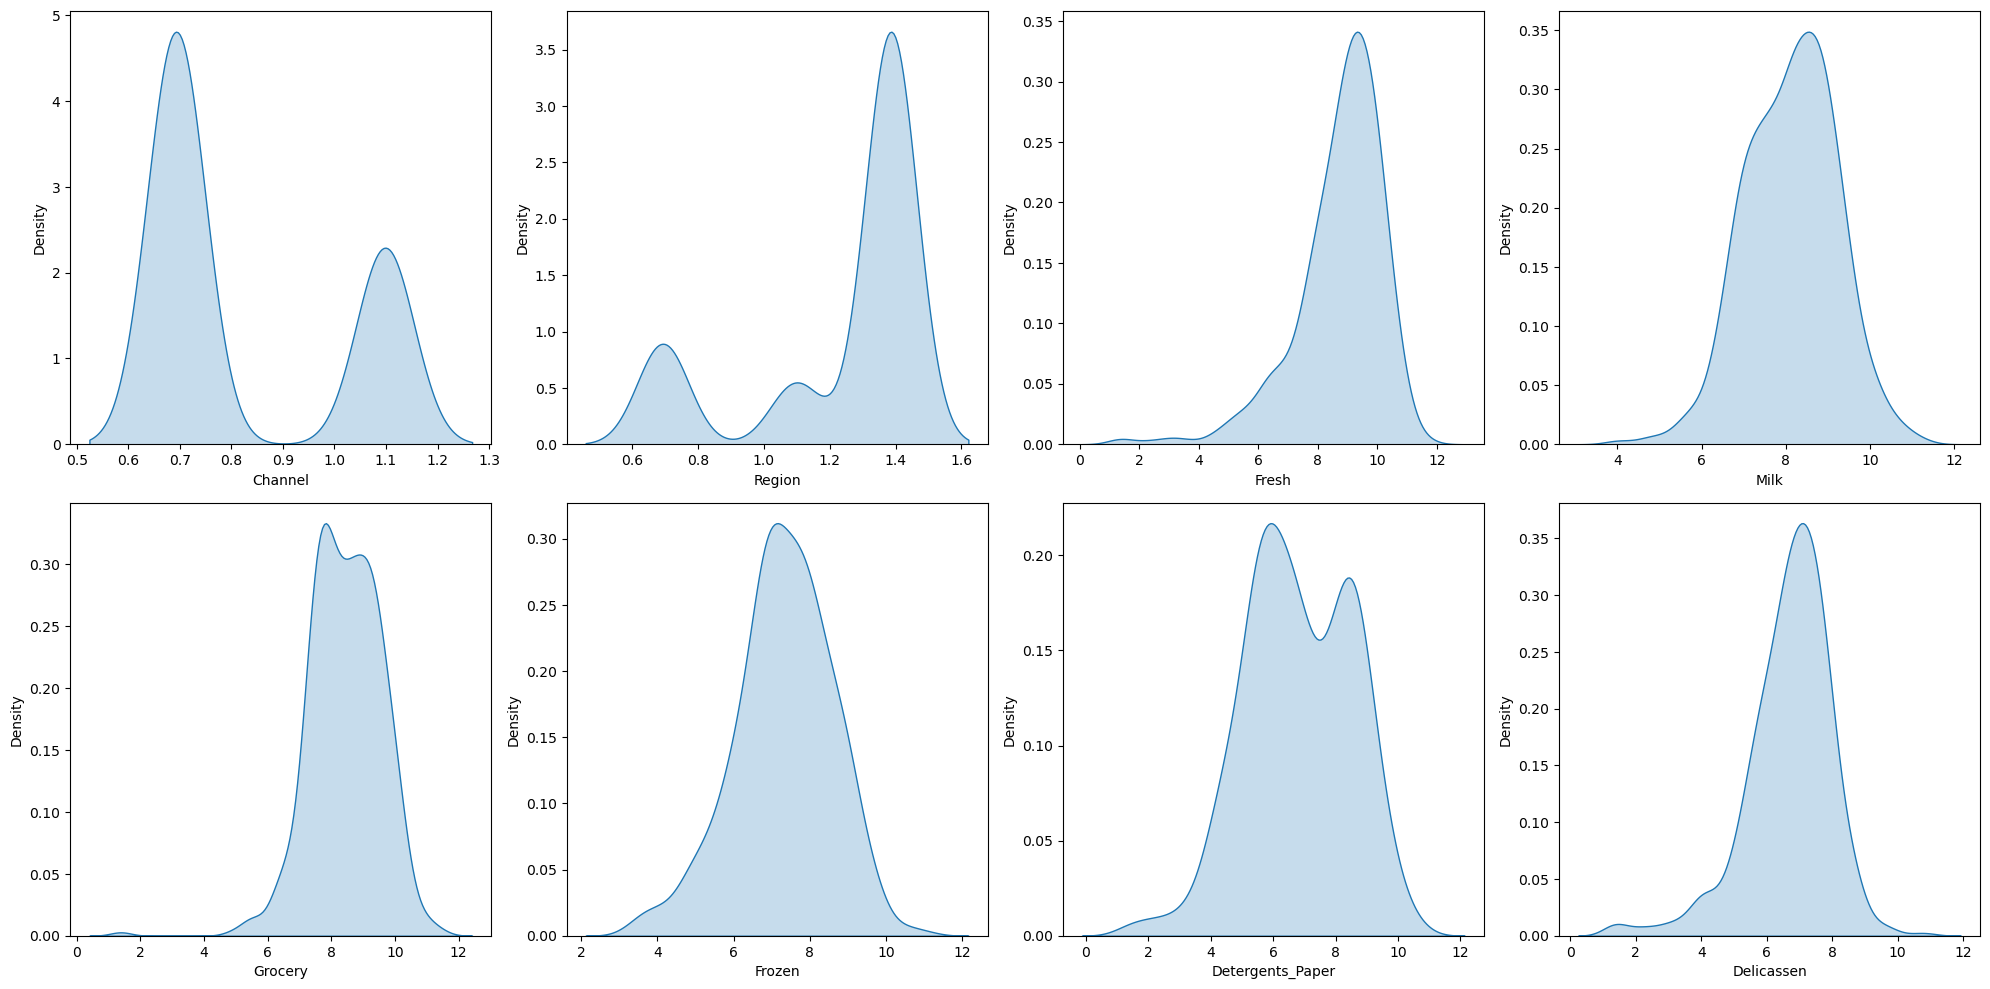

In [39]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.kdeplot(df[col],fill=True)
plt.tight_layout()
plt.show()

In [40]:
df['Channel'].unique()

array([1.09861229, 0.69314718])

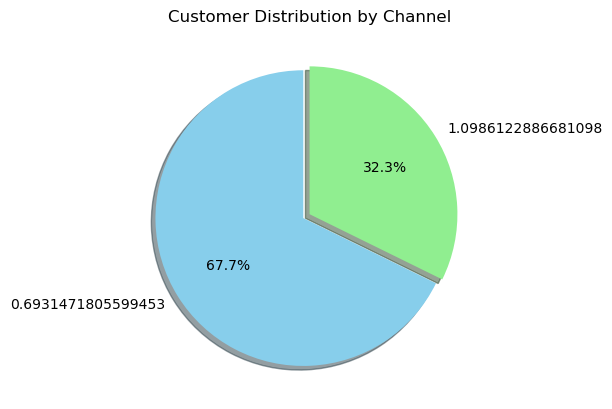

In [41]:
df['Channel'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightgreen"],
    explode=(0.05,0), 
    shadow=True
)

plt.title("Customer Distribution by Channel")
plt.ylabel("")
plt.show()

In [42]:
df['Region'].unique()

array([1.38629436, 0.69314718, 1.09861229])

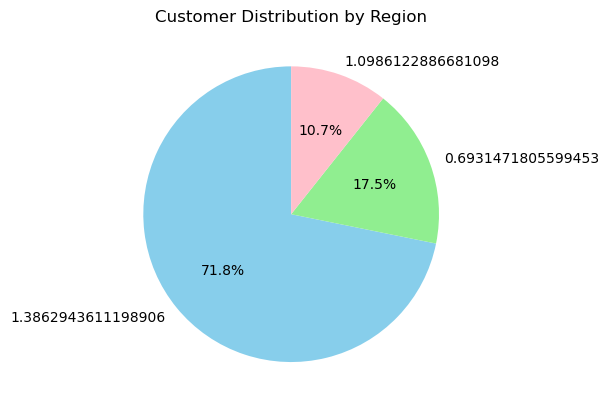

In [43]:
df['Region'].value_counts().plot.pie(
    autopct='%1.1f%%',     
    startangle=90,         
    colors=["skyblue", "lightgreen",'pink']
)

plt.title("Customer Distribution by Region") 
plt.ylabel("")                                
plt.show()                                 

In [44]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

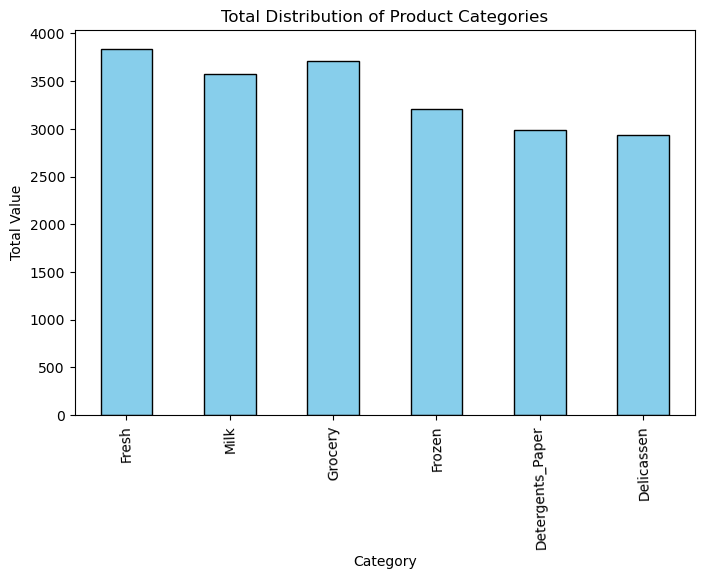

In [45]:
cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

totals = df[cols].sum()

plt.figure(figsize=(8,5))
totals.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Value")
plt.xticks(rotation=92)
plt.show()

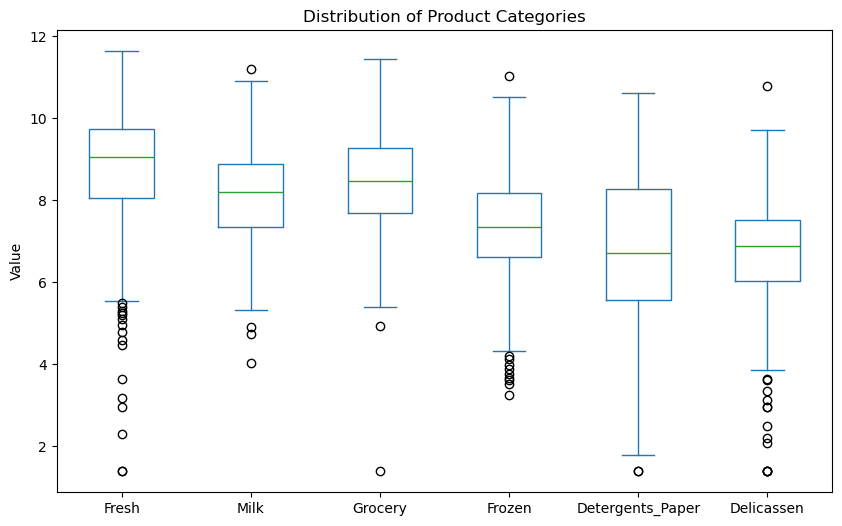

In [46]:
cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
df[cols].plot(kind="box", figsize=(10,6))
plt.title("Distribution of Product Categories")
plt.ylabel("Value")
plt.show()

In [47]:
from sklearn.preprocessing import RobustScaler
cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[cols]) 

In [48]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


KMeans Silhouette Score: 0.24364659337885566
Kmeans ARI: 0.32395771183807165


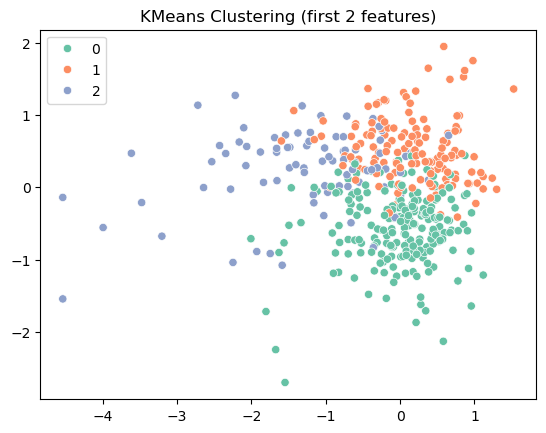

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
ari_kmeans=adjusted_rand_score(df["Channel"],labels_kmeans)
print("KMeans Silhouette Score:", sil_kmeans)
print("Kmeans ARI:",ari_kmeans)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_kmeans, palette="Set2")
plt.title("KMeans Clustering (first 2 features)")
plt.show()

Hierarchical Silhouette Score: 0.24305321817651548
Hierarchial ARI: 0.32395771183807165


c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


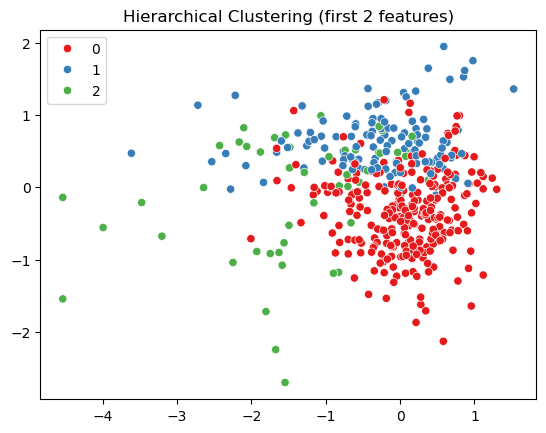

In [50]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hc = hc.fit_predict(X_scaled)

sil_hc = silhouette_score(X_scaled, labels_hc)
ari_hc=adjusted_rand_score(df["Channel"],labels_hc)
print("Hierarchical Silhouette Score:", sil_hc)
print("Hierarchial ARI:",ari_kmeans)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_hc, palette="Set1")
plt.title("Hierarchical Clustering (first 2 features)")
plt.show()


c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


DBSCAN Silhouette Score (excluding outliers): -1
ARI: 0.32395771183807165


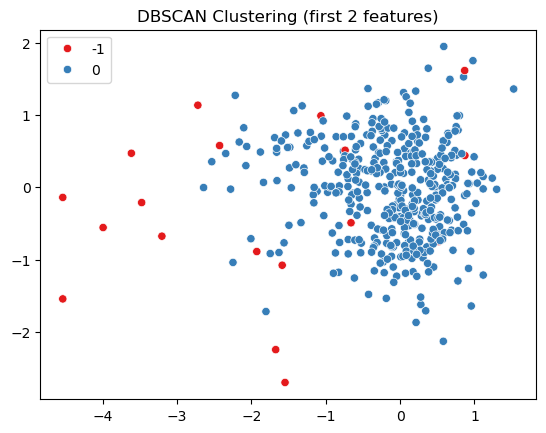

In [51]:
db = DBSCAN(eps=1.5, min_samples=5)
labels_db = db.fit_predict(X_scaled)

mask = labels_db != -1
X_no_outliers = X_scaled[mask]
labels_no_outliers = labels_db[mask]

if len(set(labels_no_outliers)) > 1:
    sil_db = silhouette_score(X_no_outliers, labels_no_outliers)
else:
    sil_db = -1  
ari_db=adjusted_rand_score(df["Channel"],labels_db)
print("DBSCAN Silhouette Score (excluding outliers):", sil_db)
print("ARI:",ari_kmeans)
sns.scatterplot(x=X_scaled[:, 0],  y=X_scaled[:, 1],  hue=labels_db,palette="Set1",legend="full")
plt.title("DBSCAN Clustering (first 2 features)")
plt.show()



In [54]:
results = []

results.append({
    "Algorithm": "KMeans",
    "Silhouette": round(sil_kmeans, 3),
    "ARI (vs Channel)": round(adjusted_rand_score(df["Channel"], labels_kmeans), 3),
    "Clusters": len(set(labels_kmeans)),
    "Outliers": 0,
    "Cluster Sizes": dict(pd.Series(labels_kmeans).value_counts().sort_index())
})

results.append({
    "Algorithm": "Hierarchical",
    "Silhouette": round(sil_hc, 3),
    "ARI (vs Channel)": round(adjusted_rand_score(df["Channel"], labels_hc), 3),
    "Clusters": len(set(labels_hc)),
    "Outliers": 0,
    "Cluster Sizes": dict(pd.Series(labels_hc).value_counts().sort_index())
})

n_clusters_db = len(set(labels_no_outliers)) if sil_db != -1 else 0
outliers_db = (labels_db == -1).sum()

ari_db = adjusted_rand_score(df["Channel"], labels_db) if n_clusters_db > 0 else -1

results.append({
    "Algorithm": "DBSCAN",
    "Silhouette": round(sil_db, 3),
    "ARI (vs Channel)": round(ari_db, 3),
    "Clusters": n_clusters_db,
    "Outliers": outliers_db,
    "Cluster Sizes": dict(pd.Series(labels_db[labels_db!=-1]).value_counts().sort_index())
})

results_df = pd.DataFrame(results)
results_df


c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\boomi\anaconda3\envs\pyai\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


,Algorithm,Silhouette,ARI (vs Channel),Clusters,Outliers,Cluster Sizes
0,KMeans,0.244,0.324,3,0,"{0: 209, 1: 149, 2: 82}"
1,Hierarchical,0.243,0.541,3,0,"{0: 265, 1: 126, 2: 49}"
2,DBSCAN,-1.000,-1.000,0,18,{0: 422}


KMeans and Hierarchical detect weak but valid clusters.

DBSCAN fails in this dataset (low density separation), leading to a negative silhouette.